In [1]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

First, login from your Twitter account and goto Twitter Apps. Create a new app (How to create twitter app) and goto Keys and access tokens and copy Consumer Key, Consumer Secret, Access Token and Access Token Secret. Tokens have been hided for security reasons

In [2]:
#Initialize
consumerKey = '--'
consumerSecret = '--'
accessToken = '--'
accessTokenSecret = '--'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

### Gather the data

Lets find the sentiments on a Popular Band - Imagine Dragons, one of my favourite bands

In [111]:
searchTerm = input("Enter a particular keyword to search about: ")
noOfterms = int(input("how many tweets do you want to search: "))
tweets = []
tweetText = []
tweets = tweepy.Cursor(api.search_tweets, q=searchTerm+" -filter:retweets", lang = "en").items(noOfterms)

Enter a particular keyword to search about: Imagine Dragons
how many tweets do you want to search: 200


In [112]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,…and it went to the imagine dragons guy? https...
1,Panic at the disco and Imagine Dragons fell of...
2,I KNOW DAMN WELL YOU DID NOT PUT IMAGINE DRAGO...
3,Imagine Dragons - Wrecked (Lyric Video) https:...
4,Do you like the best music? Listen now Bones -...
...,...
195,@tracklist Imagine Dragons 🥰
196,@Alyssaliciousss No Imagine Dragons in sight 😤
197,"@apraisekaras you know, just about every time ..."
198,Me: I’m so excited to have a relaxing weekend ...


## Data Cleaning

In [113]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())
tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [114]:
tweet_df.head()

,0,cleaned_data
0,…and it went to the imagine dragons guy? https...,and it went to the imagine dragons guy
1,Panic at the disco and Imagine Dragons fell of...,Panic at the disco and Imagine Dragons fell of...
2,I KNOW DAMN WELL YOU DID NOT PUT IMAGINE DRAGO...,I KNOW DAMN WELL YOU DID NOT PUT IMAGINE DRAGO...
3,Imagine Dragons - Wrecked (Lyric Video) https:...,Imagine Dragons Wrecked Lyric Video
4,Do you like the best music? Listen now Bones -...,Do you like the best music Listen now Bones IM...


In [115]:
#Further Cleaning- Dropping the numbers
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [116]:
tweet_df.head()

,0,cleaned_data
0,…and it went to the imagine dragons guy? https...,and it went to the imagine dragons guy
1,Panic at the disco and Imagine Dragons fell of...,Panic at the disco and Imagine Dragons fell of...
2,I KNOW DAMN WELL YOU DID NOT PUT IMAGINE DRAGO...,I KNOW DAMN WELL YOU DID NOT PUT IMAGINE DRAGO...
3,Imagine Dragons - Wrecked (Lyric Video) https:...,Imagine Dragons Wrecked Lyric Video
4,Do you like the best music? Listen now Bones -...,Do you like the best music Listen now Bones IM...


In [117]:
#Convert all words to lowercase:
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [118]:
#Lemmatization- The process of converting a word into its base form
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [119]:
tweet_df['cleaned_data'].values

array(['and it went to the imagine dragon guy',
       'panic at the disco and imagine dragon fell off so hard man',
       'i know damn well you did not put imagine dragon on this',
       'imagine dragon wrecked lyric video',
       'do you like the best music listen now bone imagine dragon on',
       'ok imagine dragon just went up in my eye bone slap',
       'de imagine dragon',
       'when you ask for imagine dragon but all they got is consider lizard',
       'yes i refuse to listen to imagine dragon because i don t trust romney s motif',
       'looking at this playlist it s insane how much music passed by after without any kind of mainstream exposure',
       'np natural by imagine dragon on',
       'i d imagine dragon make mail and plate useless but make camouflage and mobility usefu',
       'warrior feat do imagine dragon',
       'no miguel radioactive it not a imagine dragon rip off please dont sue u',
       'en el aire imagine dragon on top of the world la escuchas e

Removing Stopwords- English words that do not add much value to the sentences.
They can be safely ignored and the meaning of the sentence won't change. For example: The, He, She, is.

In [120]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [121]:
tweet_df['cleaned_data'].values

array(['went imagine dragon guy',
       'panic disco imagine dragon fell hard man',
       'know damn well put imagine dragon',
       'imagine dragon wrecked lyric video',
       'like best music listen bone imagine dragon',
       'ok imagine dragon went eye bone slap', 'de imagine dragon',
       'ask imagine dragon got consider lizard',
       'yes refuse listen imagine dragon trust romney motif',
       'looking playlist insane much music passed without kind mainstream exposure',
       'np natural imagine dragon',
       'imagine dragon make mail plate useless make camouflage mobility usefu',
       'warrior feat imagine dragon',
       'miguel radioactive imagine dragon rip please dont sue u',
       'en el aire imagine dragon top world la escuchas en',
       'believer imagine dragon',
       'good idea love song think title went imagine dragon',
       'imagine dragon thunder via', 'hate imagine dragon really see',
       'radio playing basically believer imagine dragon major

## Sentiment Analyzer Engine- Analyzing the data

The library which will be used to find the sentiment of the tweets is TextBlob. TextBlob has a function "Sentiment" which returns polarity and subjectivity Polartity is the expression which determines the sentimental aspect of an opinion -Positive, Negative or Neutral

Polarity lies between minus one to plus one where plus one means positive sentiment, minus 1 means negative and zero neutral

In [122]:
def polarityNum(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(polarityNum)

In [123]:
tweet_df['polarity'].value_counts()

Neutral              114
Positive              25
Weakly Positive       22
Weakly Negative       18
Negative              11
Strongly Positive     10
Name: polarity, dtype: int64

In [124]:
#Calculating average polarity and number of different polarities
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,noOfterms):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1

In [125]:
#Average Reaction
avgPolarity = polarity / noOfterms
avgPolarity

0.08757257846320345

In [126]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

#### Finding percentage of how people are reacting

In [127]:
positive = percentage(positive, noOfterms)
wpositive = percentage(wpositive, noOfterms)
spositive = percentage(spositive, noOfterms)
negative = percentage(negative, noOfterms)
wnegative = percentage(wnegative, noOfterms)
snegative = percentage(snegative, noOfterms)
neutral = percentage(neutral, noOfterms)

In [128]:
#Printing the data

print("The analysis shows that people are reacting following on " + searchTerm + " by analyzing " + str(noOfterms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("Final Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

The analysis shows that people are reacting following on Imagine Dragons by analyzing 200 tweets.

-----------------------------------------------------------------------------------------

Final Report: 

------------------------------------------------------------------------------------------

Detailed Report: 
12.50% people thought it was positive
11.00% people thought it was weakly positive
5.00% people thought it was strongly positive
5.50% people thought it was negative
9.00% people thought it was weakly negative
0.00% people thought it was strongly negative
57.00% people thought it was neutral


In [129]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

#### Data Visualisation Using Pie Chart

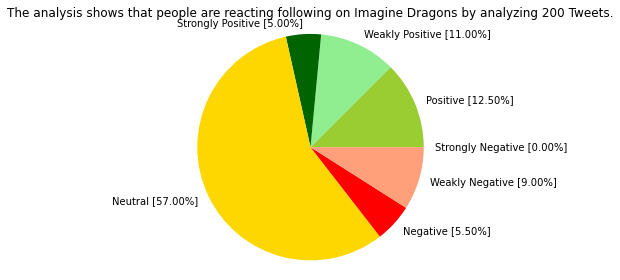

In [130]:
plt.pie(sizes, labels = labels, colors = colors)
plt.title('The analysis shows that people are reacting following on ' + searchTerm + ' by analyzing ' + str(noOfterms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()